# 電腦視覺
Computer Version(CV)主要是對影像的擷取、分析與了解，使電腦能夠如同人類視覺系統處理、分析及理解圖像，然後給予適當的輸出。
* 影像分類(Image Classification): 辨識影像的類別，一次只能分辨出一類別，如GoogLeNet、ResNet等。  
* 物件偵測(Object Detection): 從影像中找出物體位置及物體類別，能分辨出多類別，如Faster R-CNN、YOLO等。  
* 語意分割(Semantic Segmentation): 對影像中每一個像素點進行分類，如FCN、DeepLab等。  
* 實例分割(Instance Segmentation): 對影像中每一個物體進行分類，如FCIS、Mask R-CNN等。  

其他還有如:物件追蹤、3D物件偵測、風格遷移、動作辨識、人體姿態估計等。

# 物件偵測介紹
物件偵測技術是從影像中找出物體位置及物體類別，網路模型會輸出多個**類別(Classes)**和**物件框(Bounding Box)**，接著在圖片上框出物體及標示物體類別。
<img src="img/cv_1.jpg" width="700" style="float:left">  

其中物件框(Bounding Box)的格式有許多種類，常見的如圖上的(x1, y1, x2, y2)，其中(x1, y1)與(x2, y2)代表物體左上及右下。  
另一種像(x, y, w, h)，其中(x, y)為物體中心，(w, h)表示物體長和寬。

目前深度學習的物件偵測有兩種方法，「One-Stage Detector」和「Two-Stage Detector」，兩者各有優缺點，Two-Stage的準確度會優於One-Stage，而One-Stage在運算速度上會快於Two-Stage。
* Two-Stage Detector: 此方法將預測分為兩個步驟。  
 第一步驟: 又稱提出候選區域，此步會從影像中預測出可能包含的物體位置。  
 第二步驟: 將這些可能包含物體的部分逐一送入網路中進行預測，最後預測出物體的精確位置和類別。  
 
Two-Stage Detector方法因為分為兩個步驟預測，所以運算時間較長，但通常會有較好的準確度。如R-CNN、Fast R-CNN、Faster R-CNN等。  
* One-Stage Detector: 此方法只需要一個步驟。
 輸入一張影像到網路模型中，就會預測出物體位置和類別。  
 
One-Stage Detector方法只需要一個步驟就可完成預測，所以運算速度較快，但準確度通常不如Two-Stage方法。如SSD、YOLO等。

# 物件偵測發展
## R-CNN：
**Regions with CNN features(R-CNN)**在2014年發表，被公認為第一個使用深度學習的物件偵測技術。  
R-CNN屬於Two-Stage Detector，架構可以分為兩個部分，第一部分使用**selective search方法**來產生可能包含的物件的候選區域；第二部分將每個候選區域透過CNN提取影像特徵，再透過SVM分類(Classification)。  
<img src="img/r_cnn_1.jpg" width="700" style="float:left">  

R-CNN的預測流程如下：
1. 使用selective search方法，透過局部的特徵(紋理、強度或顏色等)來產生約2000個候選區域。  
2. 在Crop&Resize中，切割並調整這2000個候選區域大小，再逐一將每個選區域送入CNN提取特徵。由於CNN輸入為固定尺寸，因此輸入到CNN中的候選區域都會調整到固定大小(227, 227)。  
3. 每個候選區域在CNN產生特徵後，分別送入各類別的SVM分類器。每個SVM分類器為二元分類，所以，如果有10個類別就會有10個SVM。  
4. 最後，在Bounding Box Regression中使用回歸模型(Regression Model)，來調整候選框的位置。

<img src="img/r_cnn_2.jpg" width="700" style="float:left">  

## Fast R-CNN
Fast Regions with CNN features(Fast R-CNN)在2015年發表，一樣屬於Two-Stage Detectorz方法，為R-CNN優化版，相較於R-CNN快了25倍，且結果更準確。

<img src="img/fast_r_cnn_1.jpg" width="500" style="float:left">  

Fast R-CNN主要有三個改動：  
1. 將一張影像直接送入CNN，提取整張圖片的特徵，取代先前R-CNN，將每個候選區域逐一送入CNN提取特徵的方法，改進了需多計算時間。  
2. 提出RoI(Region of Interest) Pooling方法，RoI Pooling的輸入為Selective Search產生的候選區域和CNN產生的特徵，將圖片上的候選框位置映射到特徵圖(Feature map)上，在特徵圖上使用Pooling將特徵圖調整至相同大小。  
3. 移除SVM和回歸模型(Regression Model)，改成全連接層(Fully Connected Layer)，直接預測物件類別與物件位置。

<img src="img/fast_r_cnn_2.jpg" width="400" style="float:left">  

Fast R-CNN的預測流程如下：

<img src="img/fast_r_cnn_3.jpg" width="700" style="float:left">  

## Faster R-CNN
Faster Regions with CNN features(Faster R-CNN)在2015年發表，一樣屬於Two-Stage Detectorz方法，為Fast R-CNN優化版，相較於Fast R-CNN快了25倍，且結果更準確。

<img src="img/faster_r_cnn_1.jpg" width="400" style="float:left">

Faster R-CNN主要有兩個改動：
1. Region Proposal Networks(RPN):  
 Faster R-CNN提出一個全新的基於卷積神經網路的Region Proposal方法，取代了Selective Search方法。RPN的輸入是前面的CNN計算所得到的特徵圖，透過k個不同大小的Sliding window，輸出2k個scores(有物件和沒物件)和4k個coordinates(物體座標)。  
2. Anchor box:
 Anchor box就是對應到RPN的Sliding window，而Anchor box總共有九種不同大小，即三種尺度(scales)和三種長寬比(aspect rations)組成。由於使用多種的Anchor box
 
<img src="img/faster_r_cnn_2.jpg" width="400" style="float:left">

RPN網路的輸出並非直接預測物件框(x, y, w, h)，而是預測(tx, ty, tw, th)Anchors box的**偏移植**，再透過公式轉為(x, y, w, h)。公式如下:  

<img src="img/faster_r_cnn_3.jpg" width="400" style="float:left">

(xa, ya, wa, ha)是Anchors box的參數。  
Faster R-CNN的預測流程如下：

<img src="img/faster_r_cnn_4.jpg" width="700" style="float:left">

#### R-CNN比較
|               | R-CNN | Fast R-CNN | Faster R-CNN |
|---------------|-------|------------|--------------|
| 處理一張影像   |  50s  |     2s     |     0.2s     |
|     速度      |   x1  |     x25    |     x250     |
| mAP(VOC 2007) | 66.0% |    66.9%   |     66.0%    |
|   mAP(COCO)   |       |    39.3%   |     42.7%    |

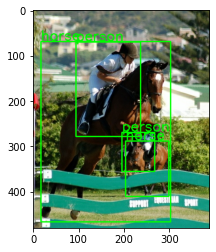

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


train_data, info = tfds.load("voc", split="train", with_info=True)

classes_list = info.features['labels'].names
for dataset in train_data.take(1):
    img = dataset['image']
    bboxes = dataset['objects']['bbox']
    labels_index = dataset['objects']['label']
    img = img.numpy()
    h, w, _ = img.shape
    for box, label_index in zip(bboxes, labels_index):
        x1 = tf.cast(box[1] * w, tf.int16).numpy()
        y1 = tf.cast(box[0] * h, tf.int16).numpy()
        x2 = tf.cast(box[3] * w, tf.int16).numpy()
        y2 = tf.cast(box[2] * h, tf.int16).numpy()
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img,
                    classes_list[label_index],
                    (x1, y1 - 3),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 244, 0), 2)
    plt.imshow(img)